## How to Handle Outliers

In [18]:
1. Delete data 
2. Imputation 
3. Transformation

SyntaxError: invalid syntax (<ipython-input-18-095e8d7a6eb6>, line 1)

## 1. Delete data 

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv(r"D:/PYTHON_NOTES/CSV/titanic.csv")
df.shape

(891, 12)

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# To detect Extreme outliers
q1 = df["Fare"].quantile(0.25)
q2 = df["Fare"].quantile(0.50)
q3 = df["Fare"].quantile(0.75)
IQR = q3 -q1
uppertail = q3 + 1.5 * IQR
lowertail = q1 - 1.5 * IQR
df.loc[(df["Fare"] >uppertail)  | (df["Fare"] <lowertail) ]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [31]:
df["Fare"].loc[~((df["Fare"] >uppertail)  | (df["Fare"] <lowertail)) ].mean()

17.822090709677408

In [33]:
df["Fare"].loc[((df["Fare"] >uppertail)  | (df["Fare"] <lowertail)) ]=17.82

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,17.820,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

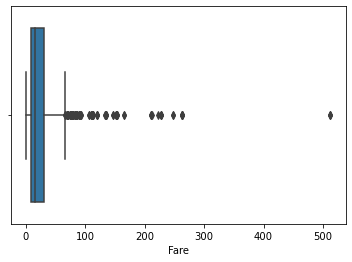

In [10]:
import seaborn as sns
sns.boxplot(df["Fare"])

In [11]:
df.loc[(df["Fare"] <=uppertail)  & (df["Fare"] >=lowertail) ]  # without outliers

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
775+116

891

# Method -1

In [13]:
fare_mean   = df["Fare"].loc[(df["Fare"] <=uppertail)  & (df["Fare"] >=lowertail) ].mean()
fare_median = df["Fare"].loc[(df["Fare"] <=uppertail)  & (df["Fare"] >=lowertail) ].median()

In [14]:
fare_mean

17.822090709677408

In [15]:
df.loc[(df["Fare"] <=uppertail)  & (df["Fare"] >=lowertail) ].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.00000,613.000000,775.000000,775.000000,775.000000
mean,445.806452,0.341935,2.48000,28.946574,0.437419,0.340645,17.822091
std,260.116285,0.474664,0.73439,14.368139,0.899838,0.785914,13.578085
min,1.000000,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,213.500000,0.000000,2.00000,20.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.00000,28.000000,0.000000,0.000000,13.000000
75%,670.500000,1.000000,3.00000,37.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000


In [16]:
df.loc[(df["Fare"] >uppertail)  | (df["Fare"] <lowertail),"Fare" ] = fare_mean

In [17]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,17.822091,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000000,C148,C


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,17.822091
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,12.662341
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.000000


<AxesSubplot:>

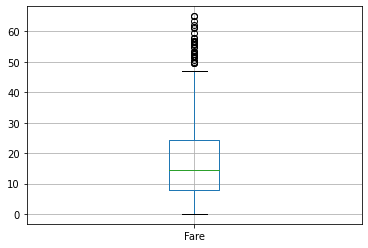

In [22]:
df[["Fare"]].boxplot()

## Method-2

In [33]:
df1 = pd.read_csv("diabetes.csv")
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

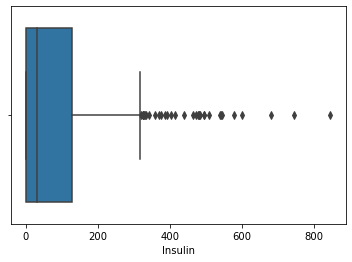

In [34]:
sns.boxplot(df1["Insulin"])

In [35]:
# To detect Extreme outliers
q1 = df1["Insulin"].quantile(0.25)
q2 = df1["Insulin"].quantile(0.50)
q3 = df1["Insulin"].quantile(0.75)

IQR = q3 - q1
uppertail = q3 + 3 * IQR
lowertail = q1 - 3 * IQR
df1.loc[(df1["Insulin"] >uppertail)  | (df1["Insulin"] <lowertail) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
409,1,172,68,49,579,42.4,0.702,28,1
584,8,124,76,24,600,28.7,0.687,52,1
655,2,155,52,27,540,38.7,0.240,25,1
753,0,181,88,44,510,43.3,0.222,26,1


In [36]:
insulin_mean = df1.loc[(df1["Insulin"]<=uppertail),"Insulin"].mean()

In [37]:
df1["Insulin"] = np.where(df1["Insulin"] >uppertail,insulin_mean,df1["Insulin"])

<AxesSubplot:>

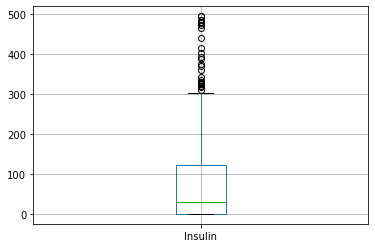

In [38]:
df1[["Insulin"]].boxplot()

In [40]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,73.384717,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,98.352356,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,122.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,495.000000,67.100000,2.420000,81.000000,1.000000


## Age

<AxesSubplot:>

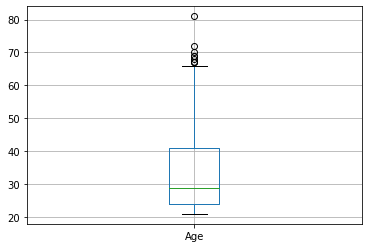

In [42]:
df1[["Age"]].boxplot()

In [43]:
# To detect Extreme outliers
q1 = df1["Age"].quantile(0.25)
q2 = df1["Age"].quantile(0.50)
q3 = df1["Age"].quantile(0.75)

IQR = q3 -q1
uppertail = q3 + 1.5 * IQR
lowertail = q1 - 1.5 * IQR
df1.loc[(df1["Age"] >uppertail)  | (df1["Age"] <lowertail) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0.0,26.8,0.186,69,0
363,4,146,78,0,0.0,38.5,0.520,67,1
453,2,119,0,0,0.0,19.6,0.832,72,0
459,9,134,74,33,60.0,25.9,0.460,81,0
489,8,194,80,0,0.0,26.1,0.551,67,0
537,0,57,60,0,0.0,21.7,0.735,67,0
666,4,145,82,18,0.0,32.5,0.235,70,1
674,8,91,82,0,0.0,35.6,0.587,68,0
684,5,136,82,0,0.0,0.0,0.640,69,0


In [44]:
df1["Age"] = np.where(df1["Age"]>uppertail,0,df1["Age"])
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,73.384717,31.992578,0.471876,32.420573,0.348958
std,3.369578,31.972618,19.355807,15.952218,98.352356,7.884160,0.331329,11.598855,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,122.000000,36.600000,0.626250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,495.000000,67.100000,2.420000,66.000000,1.000000


In [45]:
uppertail

66.5

## 3. Transformation

In [ ]:
# USE CASE
1. Reduce impact of outliers
2. To calculate distance between two data points
3. Obeservation will not be deleted
4. KNN algorithm

1) Log Transformation
2) Scaling:
    a) Normalization
    b) standardization

In [46]:
df = pd.read_csv("diabetes.csv")

## 3.1 Log Transformation

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

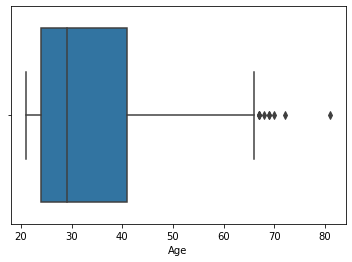

In [47]:
sns.boxplot(df["Age"])

In [ ]:
from sklearn.svm import SVC

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

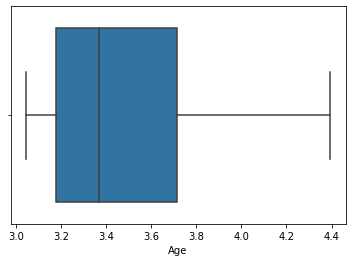

In [48]:
sns.boxplot(np.log(df["Age"]))

<AxesSubplot:xlabel='Age', ylabel='Density'>

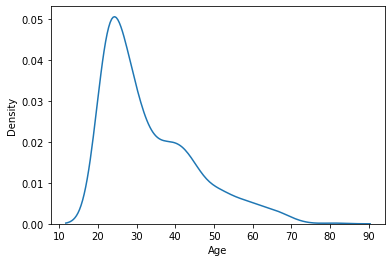

In [49]:
sns.kdeplot(df["Age"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

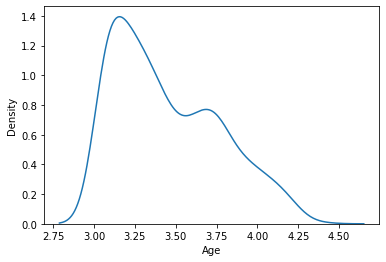

In [50]:
sns.kdeplot(np.log(df["Age"]))

## 2. cuberoot Transformation

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

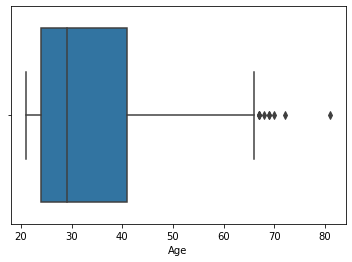

In [52]:
sns.boxplot((df["Age"]))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

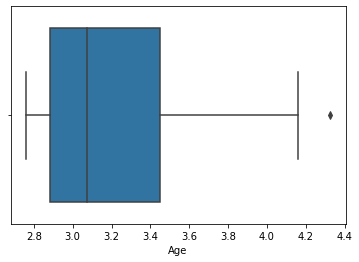

In [51]:
sns.boxplot(np.cbrt(df["Age"]))

## 3.3 Sqrt Trnasformation

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

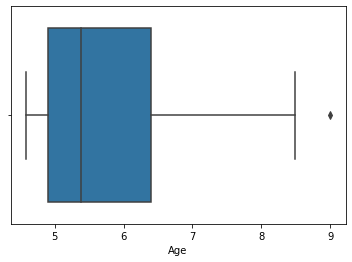

In [53]:
sns.boxplot(np.sqrt(df["Age"]))

## 3.4 recprocal

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

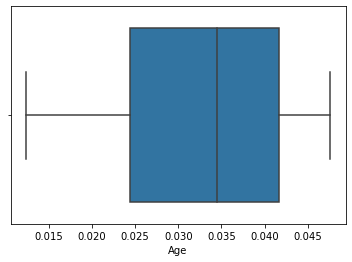

In [54]:
sns.boxplot(1/df["Age"])

## 1. Normalization

In [56]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
BMI_max = df["BMI"].max()
BMI_min = df["BMI"].min()
BMI_max,BMI_min

(67.1, 0.0)

In [62]:
# 33.6
BMI = (33.6 - BMI_min)/(BMI_max - BMI_min)
BMI

0.5007451564828614

In [63]:
# 67.2
BMI = (67.2 - BMI_min)/(BMI_max - BMI_min)
BMI

1.0014903129657229

In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [67]:
normal = MinMaxScaler()
BMI_scale = normal.fit_transform(df[["BMI"]])
df["BMI_scale"] = pd.DataFrame(BMI_scale)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_scale
0,6,148,72,35,0,33.6,0.627,50,1,0.500745
1,1,85,66,29,0,26.6,0.351,31,0,0.396423
2,8,183,64,0,0,23.3,0.672,32,1,0.347243
3,1,89,66,23,94,28.1,0.167,21,0,0.418778
4,0,137,40,35,168,43.1,2.288,33,1,0.642325


In [69]:
df[["BMI","BMI_scale"]]

,BMI,BMI_scale
0,33.6,0.500745
1,26.6,0.396423
2,23.3,0.347243
3,28.1,0.418778
4,43.1,0.642325
...,...,...
763,32.9,0.490313
764,36.8,0.548435
765,26.2,0.390462
766,30.1,0.448584


## 5.Standardization

In [ ]:
# it is same as z_score
std_scalar = (X- Xmean)/std

In [70]:
obj_std = StandardScaler()
BMI_scalar_std = obj_std.fit_transform(df[["BMI"]])
df["BMI_scalar_std"] = pd.DataFrame(BMI_scalar_std)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_scale,BMI_scalar_std
0,6,148,72,35,0,33.6,0.627,50,1,0.500745,0.204013
1,1,85,66,29,0,26.6,0.351,31,0,0.396423,-0.684422
2,8,183,64,0,0,23.3,0.672,32,1,0.347243,-1.103255
3,1,89,66,23,94,28.1,0.167,21,0,0.418778,-0.494043
4,0,137,40,35,168,43.1,2.288,33,1,0.642325,1.409746


<AxesSubplot:xlabel='BMI_scalar_std', ylabel='Density'>

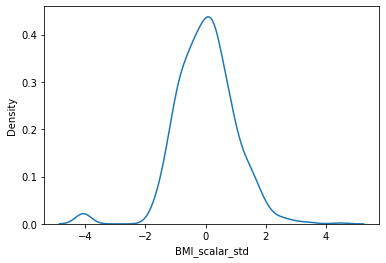

In [71]:
sns.kdeplot(df["BMI_scalar_std"])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

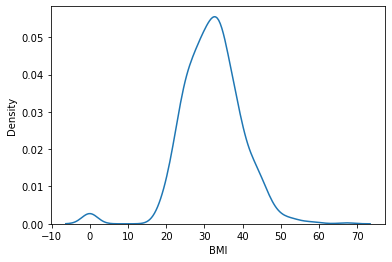

In [72]:
sns.kdeplot(df["BMI"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

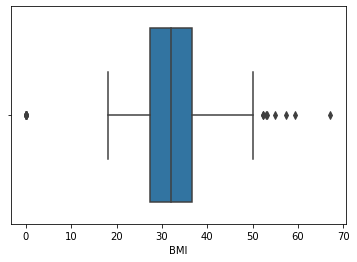

In [73]:
sns.boxplot(df["BMI"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

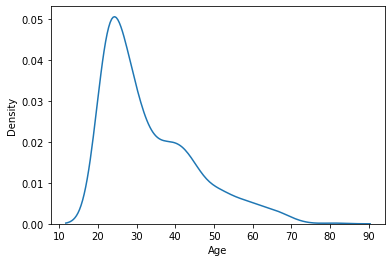

In [75]:
sns.kdeplot(df["Age"])

In [76]:
obj_std = StandardScaler()
Age_scalar_std = obj_std.fit_transform(df[["Age"]])
df["Age_scalar_std"] = pd.DataFrame(Age_scalar_std)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_scale,BMI_scalar_std,Age_scalar_std
0,6,148,72,35,0,33.6,0.627,50,1,0.500745,0.204013,1.425995
1,1,85,66,29,0,26.6,0.351,31,0,0.396423,-0.684422,-0.190672
2,8,183,64,0,0,23.3,0.672,32,1,0.347243,-1.103255,-0.105584
3,1,89,66,23,94,28.1,0.167,21,0,0.418778,-0.494043,-1.041549
4,0,137,40,35,168,43.1,2.288,33,1,0.642325,1.409746,-0.020496


<AxesSubplot:xlabel='Age_scalar_std', ylabel='Density'>

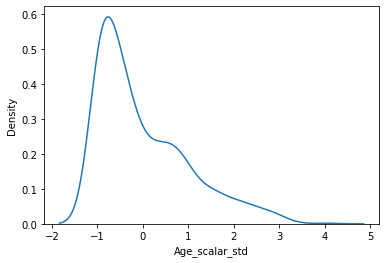

In [77]:
sns.kdeplot(df["Age_scalar_std"])

In [ ]:
Note:
    1) If data is normally distributed then we use standarscalar >> sns.kdeplot()
    2) if data is not normally distributed then we prefered MinMaxScalar

## BOX COX Transformation

In [78]:
from scipy.stats import boxcox

In [83]:
age = boxcox(df["Age"])[0]
age

array([0.90109258, 0.89241067, 0.89313849, 0.88108338, 0.89382018,
       0.89163197, 0.88788657, 0.89079693, 0.9018729 , 0.90211286,
       0.89163197, 0.89445994, 0.90277994, 0.90318526, 0.90136337,
       0.89313849, 0.89241067, 0.89241067, 0.89382018, 0.89313849,
       0.88893198, 0.90109258, 0.89802868, 0.89079693, 0.90136337,
       0.89802868, 0.8988258 , 0.88270356, 0.90277994, 0.89666771,
       0.90337732, 0.88989933, 0.88270356, 0.88989933, 0.89954888,
       0.89382018, 0.89506146, 0.89988576, 0.88893198, 0.90256589,
       0.88788657, 0.89616259, 0.9005155 , 0.90211286, 0.89759876,
       0.88675342, 0.89079693, 0.88270356, 0.89241067, 0.88552118,
       0.88270356, 0.88788657, 0.89163197, 0.90298626, 0.89843717,
       0.88108338, 0.89802868, 0.89241067, 0.89919594, 0.88270356,
       0.88108338, 0.89714573, 0.89562804, 0.88552118, 0.89843717,
       0.89313849, 0.89666771, 0.90211286, 0.88675342, 0.88893198,
       0.88989933, 0.88788657, 0.89843717, 0.88417651, 0.88270

<AxesSubplot:ylabel='Density'>

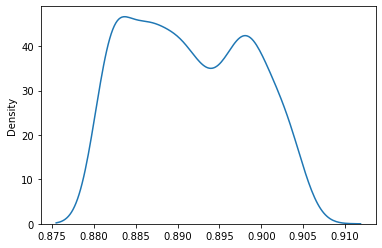

In [84]:
sns.kdeplot(age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

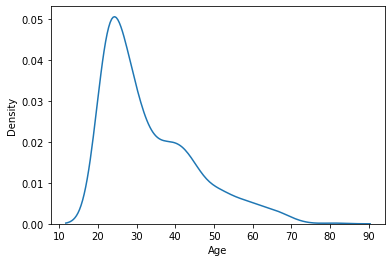

In [86]:
sns.kdeplot(df["Age"])